In [1]:
"""IMPORTING MODULES AND DATASET"""
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import eeg_commons as egc
import Get_Connectivity_Networks as getCN
import numpy as np
import scipy
import mne
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

In [2]:
builtin_montages = mne.channels.get_builtin_montages(descriptions = True)
for montage_name, montage_description in builtin_montages:
    print(f"{montage_name}: {montage_description}")

standard_1005: Electrodes are named and positioned according to the international 10-05 system (343+3 locations)
standard_1020: Electrodes are named and positioned according to the international 10-20 system (94+3 locations)
standard_alphabetic: Electrodes are named with LETTER-NUMBER combinations (A1, B2, F4, …) (65+3 locations)
standard_postfixed: Electrodes are named according to the international 10-20 system using postfixes for intermediate positions (100+3 locations)
standard_prefixed: Electrodes are named according to the international 10-20 system using prefixes for intermediate positions (74+3 locations)
standard_primed: Electrodes are named according to the international 10-20 system using prime marks (' and '') for intermediate positions (100+3 locations)
biosemi16: BioSemi cap with 16 electrodes (16+3 locations)
biosemi32: BioSemi cap with 32 electrodes (32+3 locations)
biosemi64: BioSemi cap with 64 electrodes (64+3 locations)
biosemi128: BioSemi cap with 128 electrodes (1

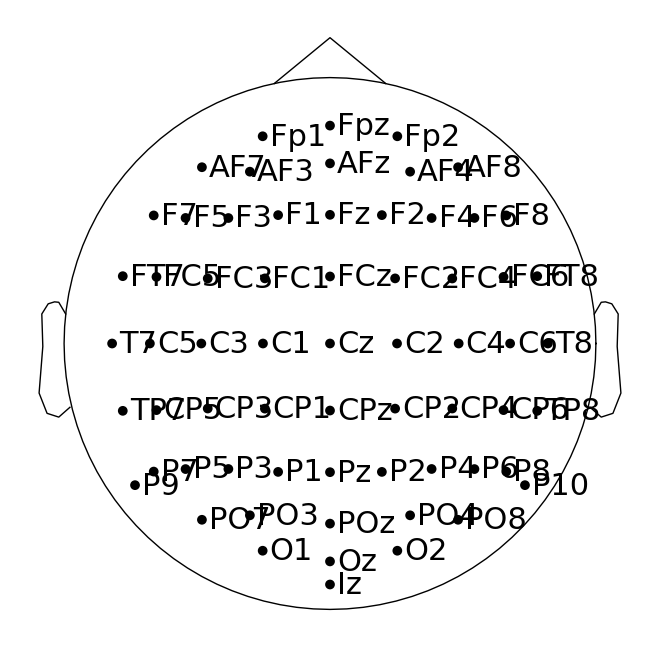

In [3]:
biosemi_montage = mne.channels.make_standard_montage("biosemi64")
biosemi_montage.plot()
node_names =[
            "Fp1",
            "AF7",
            "AF3",
            "F1",
            "F3",
            "F5",
            "F7",
            "FT7",
            "FC5",
            "FC3",
            "FC1",
            "C1",
            "C3",
            "C5",
            "T7",
            "TP7",
            "CP5",
            "CP3",
            "CP1",
            "P1",
            "P3",
            "P5",
            "P7",
            "P9",
            "PO7",
            "PO3",
            "O1",
            "Iz",
            "Oz",
            "POz",
            "Pz",
            "CPz",
            "Fpz",
            "Fp2",
            "AF8",
            "AF4",
            "AFz",
            "Fz",
            "F2",
            "F4",
            "F6",
            "F8",
            "FT8",
            "FC6",
            "FC4",
            "FC2",
            "FCz",
            "Cz",
            "C2",
            "C4",
            "C6",
            "T8",
            "TP8",
            "CP6",
            "CP4",
            "CP2",
            "P2",
            "P4",
            "P6",
            "P8",
            "P10",
            "PO8",
            "PO4",
            "O2",
        ]

In [4]:
"""RUN THIS CELL IF YOU WANT PLOT TO BE ANOMALY SCORES"""
results = scipy.io.loadmat('anomalyscore.mat')['anom_scores']
print(results.shape)
avg_eeg = results

(20, 64, 50)


In [5]:
info = mne.create_info(node_names, 512, 'eeg')
print(info)
avg_eeg = avg_eeg/1000000          #pretty sure these measurements are in uV already

eeg_montage = []
for patient in range(20):
    eeg_montage.append(mne.EvokedArray(avg_eeg[patient], info))  #Setting up montage plot for every signal
    eeg_montage[patient].set_montage(biosemi_montage)
results = scipy.io.loadmat('results.mat')['hubnodes']

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 512.0 Hz
>


In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.constrained_layout.use'] = False
plt.rcParams.update({'font.size': 20})

Below is the plot of patient 2:
Hubnodes are: ['FCz', 'P8', 'O2']


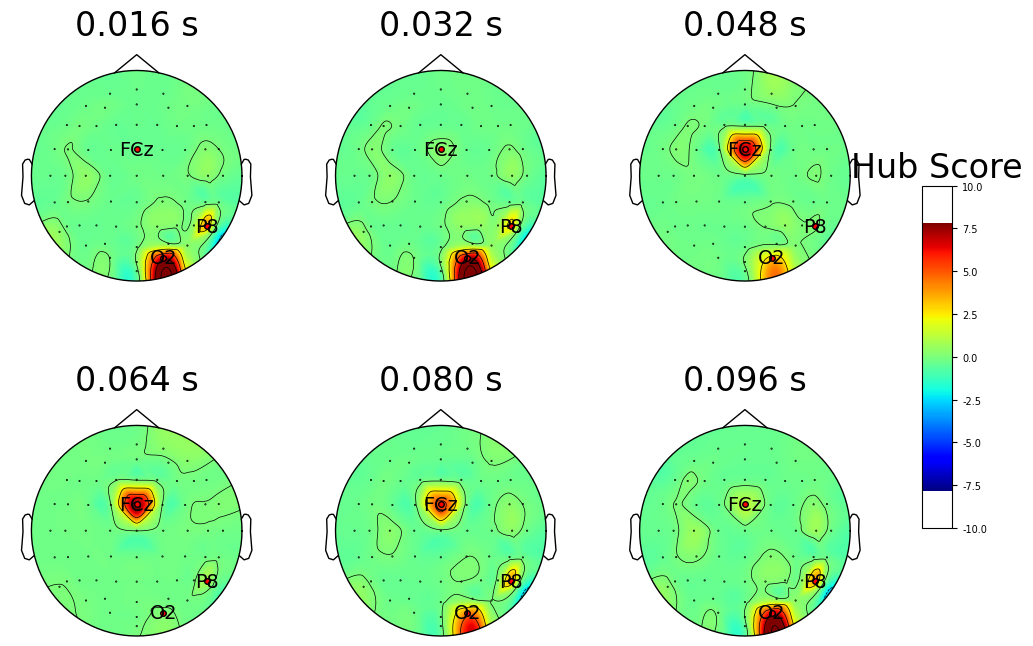

Below is the plot of patient 2:


In [7]:
patient = 1
print("Below is the plot of patient " + str(patient + 1) + ":")
name_hub = []
for index, value in enumerate(results[:, patient]):
    if value == 1:
        name_hub.append(node_names[index])
print("Hubnodes are: " + str(name_hub))
highlight = np.ones([50,64])
highlight = np.transpose((highlight*results[:,patient]))
#0.219, 0.234, 0.250, 0.266, 0.281, 0.297
fig_1 = eeg_montage[patient].plot_topomap(times = [0.016, 0.032, 0.048, 0.064, 0.080, 0.096], ch_type = 'eeg', mask_params = dict(marker='o', markerfacecolor='r', markeredgecolor='k',
    linewidth=0, markersize=4), mask = highlight,  show_names = True, cmap = ('jet',0), res = 1024, size = 2, nrows = 2, units = 'Hub Score')
print("Below is the plot of patient " + str(patient + 1) + ":")

In [8]:
plt.rcParams['figure.constrained_layout.use'] = True

[<matplotlib.patches.Rectangle object at 0x7fae70fec790>, <Axes: title={'center': '0.016 s'}>, <Axes: title={'center': '0.032 s'}>, <Axes: title={'center': '0.048 s'}>, <Axes: title={'center': 'Hub Score'}>, <Axes: title={'center': '0.064 s'}>, <Axes: title={'center': '0.080 s'}>, <Axes: title={'center': '0.096 s'}>]


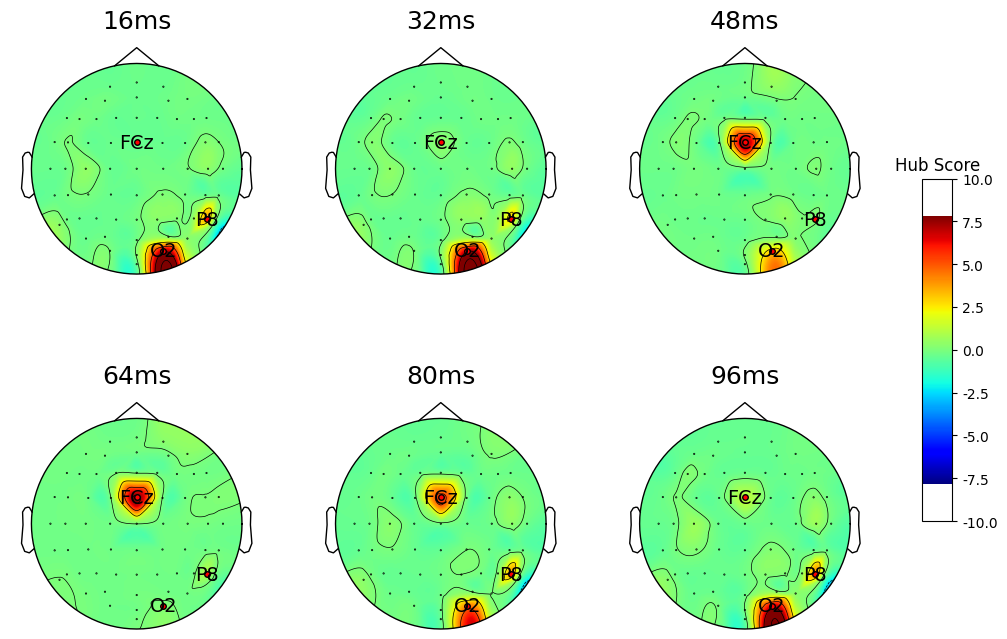

In [9]:
#fig_1.suptitle("Anomaly Scores of Patient 2")
#0.219, 0.234, 0.250, 0.266, 0.281, 0.297
print(fig_1.get_children())
fig_1.get_children()[1].set_title('16ms', fontdict = {'fontsize': 18})
fig_1.get_children()[2].set_title('32ms', fontdict = {'fontsize': 18})
fig_1.get_children()[3].set_title('48ms', fontdict = {'fontsize': 18})
fig_1.get_children()[4].set_title('Hub Score', fontdict = {'fontsize': 12})
fig_1.get_children()[4].tick_params(labelsize = 10)
fig_1.get_children()[5].set_title('64ms', fontdict = {'fontsize': 18})
fig_1.get_children()[6].set_title('80ms', fontdict = {'fontsize': 18})
fig_1.get_children()[7].set_title('96ms', fontdict = {'fontsize': 18})
fig_1

In [10]:
fig_1.savefig("patient2topo2rows.pdf", format="pdf", bbox_inches="tight")